In [45]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [46]:
# # Load the csv file
df = pd.read_csv("Crop_recommendation.csv")

In [47]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [48]:
# Split the data into features and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [49]:
X = df[["N", "P", "K", "temperature","humidity","ph","rainfall"]]
y = df["label"]

In [50]:
# # Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [51]:
df.shape

(2200, 8)

# **Random Forest Classifier**

In [52]:
# # Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [53]:
rf_model = RandomForestClassifier()

In [54]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
# Make predictions on test data
predictions = rf_model.predict(X_test)

In [56]:
# Evaluate the model
accuracy = rf_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9954545454545455


In [57]:
# Example usage: Predict crop for a new set of features
new_features = [[117 ,32,34,26.2724184,52.12739421,6.758792552,127.1752928,]]  # Replace with your own set of features
predicted_crop = model.predict(new_features)
print("Predicted crop:", predicted_crop)

Predicted crop: ['apple']


In [58]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

# **Support Vector Machine (SVM)**

In [59]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Step 5: Feature Scaling (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train SVM Classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train_scaled, y_train)

# Step 7: Make Predictions
y_pred = svm_model.predict(X_test_scaled)

# Step 8: Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9848484848484849
Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        32
      banana       1.00      1.00      1.00        24
   blackgram       1.00      1.00      1.00        29
    chickpea       1.00      1.00      1.00        36
     coconut       1.00      1.00      1.00        34
      coffee       1.00      1.00      1.00        27
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        32
        jute       0.84      1.00      0.91        42
 kidneybeans       1.00      1.00      1.00        21
      lentil       0.97      1.00      0.98        31
       maize       1.00      1.00      1.00        25
       mango       1.00      1.00      1.00        27
   mothbeans       1.00      0.97      0.98        33
    mungbean       1.00      1.00      1.00        28
   muskmelon       1.00      1.00      1.00        21
      orange       1.00     

# **K Neighbors Classifier**

In [60]:
from sklearn.neighbors import KNeighborsClassifier

X = df.drop('label', axis=1)
y = df['label']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Train KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust k
knn_model.fit(X_train_scaled, y_train)

#Make Predictions
y_pred = knn_model.predict(X_test_scaled)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9757575757575757
Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        32
      banana       1.00      1.00      1.00        24
   blackgram       0.97      1.00      0.98        29
    chickpea       1.00      1.00      1.00        36
     coconut       1.00      1.00      1.00        34
      coffee       1.00      1.00      1.00        27
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        32
        jute       0.84      0.98      0.90        42
 kidneybeans       1.00      1.00      1.00        21
      lentil       0.94      1.00      0.97        31
       maize       1.00      1.00      1.00        25
       mango       1.00      1.00      1.00        27
   mothbeans       1.00      0.91      0.95        33
    mungbean       1.00      1.00      1.00        28
   muskmelon       1.00      1.00      1.00        21
      orange       1.00     

# **Logistic Regression**

In [61]:
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression Model
logreg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg_model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9651515151515152
Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        32
      banana       1.00      1.00      1.00        24
   blackgram       1.00      1.00      1.00        29
    chickpea       1.00      1.00      1.00        36
     coconut       1.00      1.00      1.00        34
      coffee       1.00      1.00      1.00        27
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        32
        jute       0.83      0.93      0.88        42
 kidneybeans       1.00      1.00      1.00        21
      lentil       0.97      0.97      0.97        31
       maize       1.00      1.00      1.00        25
       mango       1.00      1.00      1.00        27
   mothbeans       0.97      0.88      0.92        33
    mungbean       0.82      1.00      0.90        28
   muskmelon       1.00      1.00      1.00        21
      orange       1.00     

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# **Extreme Gradient Boosting (XGBoost)**

In [63]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode the string labels into integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])

X = df.drop('label', axis=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:32:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9863636363636363
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.96      0.96      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       0.95      1.00      0.97        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00     

# **Light Gradient Boosting Machine**

In [64]:
import lightgbm as lgb

# Encode Labels (if labels are strings)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])

# Prepare Features
X = df.drop('label', axis=1)

# Feature Scaling (LightGBM doesn’t require it, but can be done for consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LightGBM Classifier
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train_scaled, y_train)

# Step 8: Predict and Evaluate
y_pred = lgb_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1339
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.169004
[LightGBM] [Info] Start training from score -3.182610
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.018722
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -2.984433
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.078620
[LightGBM] 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


# To see the label(y) after LabelEncoder

In [65]:
from sklearn.preprocessing import LabelEncoder

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])

# Print encoded y
print("Encoded y values:\n", y)

# Print mapping of original labels to encoded values
print("\nLabel Mapping:")
for label, encoded in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{encoded}: {label}")

Encoded y values:
 [20 20 20 ...  5  5  5]

Label Mapping:
0: apple
1: banana
2: blackgram
3: chickpea
4: coconut
5: coffee
6: cotton
7: grapes
8: jute
9: kidneybeans
10: lentil
11: maize
12: mango
13: mothbeans
14: mungbean
15: muskmelon
16: orange
17: papaya
18: pigeonpeas
19: pomegranate
20: rice
21: watermelon


# **Naive Bayes (Gaussian)**

In [66]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.9954545454545455


# **Decision Tree Classifier**

In [67]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9863636363636363


# **Gradient Boosting Classifier(sklearn)**

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.9818181818181818


# **Extra Trees Classifier**

In [69]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize and train the model
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_et = et_model.predict(X_test_scaled)

# Evaluate the model
print("Extra Trees Classifier Accuracy:", accuracy_score(y_test, y_pred_et))
print("Classification Report:\n", classification_report(y_test, y_pred_et, target_names=label_encoder.classes_))

Extra Trees Classifier Accuracy: 0.9886363636363636
Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.79      1.00      0.88        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.88      0.93        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
     

# ***All In One***

In [75]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import lightgbm as lgb
from xgboost import XGBClassifier


# Encode Labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])

# Split Features and Labels
X = df.drop('label', axis=1)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Models
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
nb_model = GaussianNB()
gb_model = GradientBoostingClassifier(random_state=42)
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
knn_model = KNeighborsClassifier()
svm_model = SVC(probability=True, random_state=42)
#lgb_model = lgb.LGBMClassifier(random_state=42)

# Create a model dictionary
models = {
    "Random Forest": rf_model,
    "Decision Tree": dt_model,
    "Naive Bayes": nb_model,
    "Gradient Boosting": gb_model,
    "Extra Trees": et_model,
    "XGBoost": xgb_model,
    "Logistic Regression": logreg_model,
    "KNN": knn_model,
    "SVM": svm_model,
    #"LightGBM": lgb_model,
}

#Train, Predict, and Evaluate All Models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} - Accuracy: {acc:.4f}")

    # Convert to original string labels for the report
    y_test_labels = label_encoder.inverse_transform(y_test)
    y_pred_labels = label_encoder.inverse_transform(y_pred)

    print(classification_report(y_test_labels, y_pred_labels, zero_division=0))



Random Forest - Accuracy: 0.9932
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00    

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:39:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Accuracy: 0.9864
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.96      0.96      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       0.95      1.00      0.97        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14

# **Model Comparison**

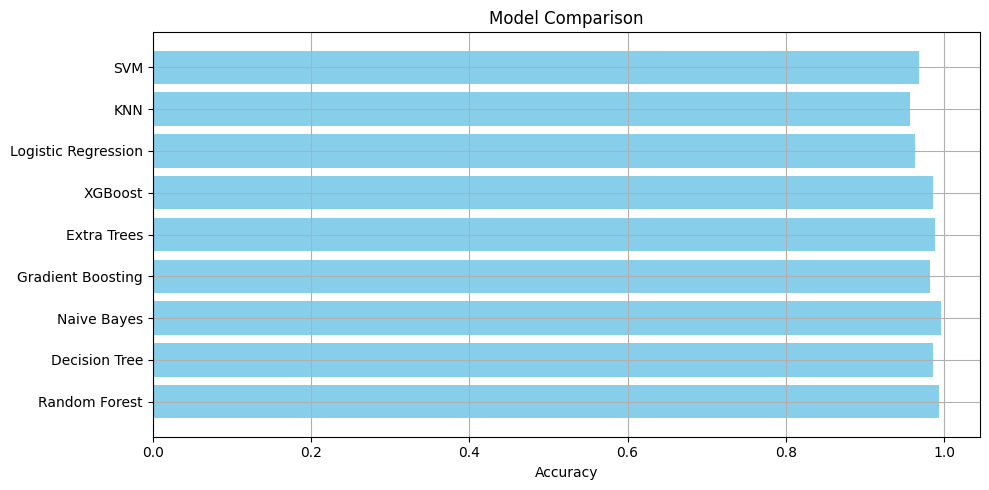

In [76]:
import matplotlib.pyplot as plt

model_names = []
accuracies = []

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    model_names.append(name)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 5))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel("Accuracy")
plt.title("Model Comparison")
plt.grid(True)
plt.tight_layout()
plt.show()


# **Cross-Validation for Robustness**

In [77]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"{name} - CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


Random Forest - CV Accuracy: 0.9949 ± 0.0049
Decision Tree - CV Accuracy: 0.9852 ± 0.0063
Naive Bayes - CV Accuracy: 0.9955 ± 0.0034
Gradient Boosting - CV Accuracy: 0.9875 ± 0.0058
Extra Trees - CV Accuracy: 0.9932 ± 0.0046


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:17:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:17:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:17:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:17:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:17:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - CV Accuracy: 0.9864 ± 0.0066
Logistic Regression - CV Accuracy: 0.9699 ± 0.0096
KNN - CV Accuracy: 0.9761 ± 0.0043
SVM - CV Accuracy: 0.9847 ± 0.0039


# **Class Distribution**

<ipython-input-78-1318808016>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, order=df['label'].value_counts().index, palette="viridis")


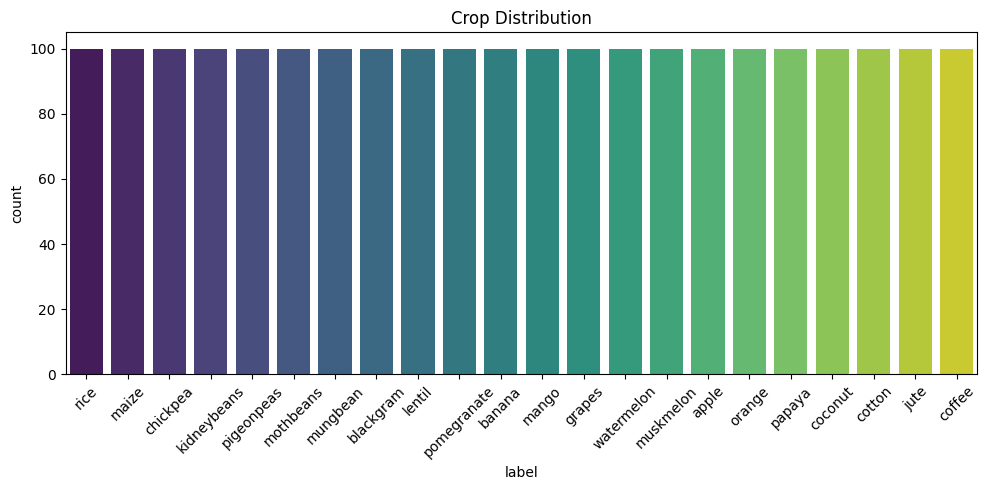

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=df, order=df['label'].value_counts().index, palette="viridis")
plt.xticks(rotation=45)
plt.title("Crop Distribution")
plt.tight_layout()
plt.show()


# **Correlation Heatmap**

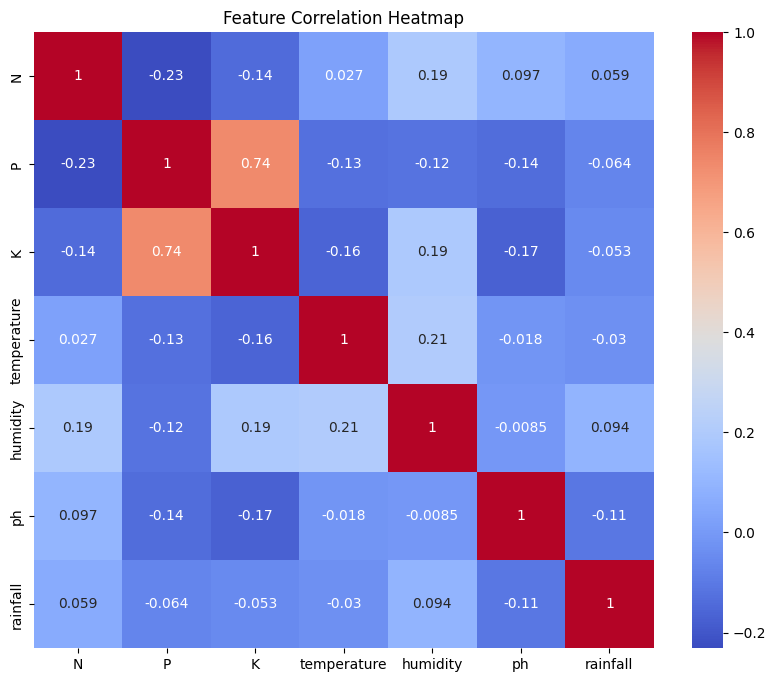

In [79]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop('label', axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()
